# Rocket Challenge

In [18]:
from math import sin, cos, log, ceil
import numpy as np
import sympy
from sympy.functions.special.delta_functions import Heaviside
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [19]:
#model parameters
g = 9.81 #force of gravity in m/(s^2)
ms = 50 #weight of rocket shell in kg
rho = 1.091 #average air density in kg/(m^3)
r = 0.5 #maxiumum radius of rocket cross section in m
A = np.pi*r**2 #maxiumum cross sectional area of rocket in m^2
ve = 325 #exhaust velocity in m/s
CD = 0.15 #drag coefficient

#initial conditions
mp0 = 100 #initial weight of rocket propellant
h0 = 0 #initial height in m
v0 = 0 #initial velocity in m/s
mp_dot0 = Heaviside(0) 
a0 = 0 #intial acceleration in m/(s^2)



In [20]:
def f(u):
    
    h = u[0]
    v = u[1]
    return np.array([v, (-(ms+mp)*g + mp_dot*ve - 0.5*rho*v*np.abs(v)*A*CD)/(ms+mp)])

In [21]:
def euler_step(u, f, dt):
    return u + dt * f(u)

In [22]:
T = 100                          # final time
dt = 0.1                           # time increment
t = np.arange(0,T+dt,dt)      # time discretization
N = len(t)
mp_int = 20*dt*0.5

# initialize the array containing the solution for each time-step
u = np.empty((N, 2))
u[0] = np.array([h0, v0]) #fill first element with initial values

#time loop - Euler Method
for i, tt in enumerate(t[1:(N-1)]):
    n=i+1
    
    mp_dot = 20*(Heaviside(tt)-Heaviside(tt-5))
    mp_int = mp_int + mp_dot*dt
    mp = mp0 - mp_int
    
    u[n+1] = euler_step(u[n], f, dt)


In [23]:
h = u[:,0]
v = u[:,1]

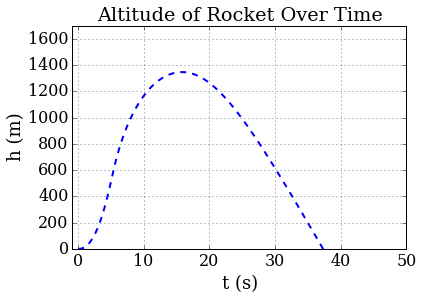

In [24]:
# visualization of the path
#pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.title('Altitude of Rocket Over Time')
pyplot.xlabel(r't (s)', fontsize=18)
pyplot.ylabel(r'h (m)', fontsize=18)
pyplot.plot(t, h, 'b--', lw=2);
pyplot.xlim(-1,50)
pyplot.ylim(0,1700);

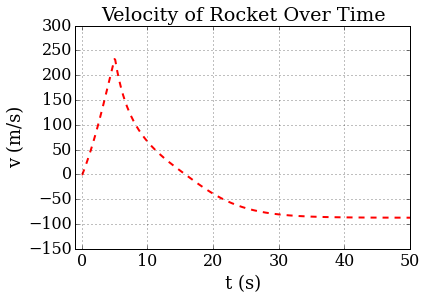

In [25]:
# visualization of the path
#pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.title('Velocity of Rocket Over Time')
pyplot.xlabel(r't (s)', fontsize=18)
pyplot.ylabel(r'v (m/s)', fontsize=18)
pyplot.plot(t, v, 'r--', lw=2);
pyplot.xlim(-1,50)
pyplot.ylim(-150,300);

## Assessment

At time $t=3.2s$, what is the mass (in kg) of rocket propellant remaining in the rocket?

In [26]:
T1 =  3.2                    # final time
dt1 = 0.1                    # time increment
t1 = np.arange(0,T1+dt1,dt1)    # time discretization
N1 = len(t1)
mp_int1 = 0
mp01= 100 

#time loop 
for i1, tt1 in enumerate(t1):
    mp_dot1 = 20*(Heaviside(tt1)-Heaviside(tt1-5))
    mp_int1 = mp_int1 + mp_dot1*dt1
    mp1 = mp01 - mp_int1

"%.2f kg of rocket propellant remain at 3.2s" %mp1
print()

What is the maximum speed of the rocket in $\frac{m}{s}$?
    At what time does this occur (in seconds)? 
    What is the altitude at this time (in meters)? 
    

In [27]:
maxv = max(v)
vmax_loc = np.where(v == maxv)[0][0]
"Maximum Velocity, Time: (%.2f m/s, %s s)"  %(maxv, t[vmax_loc])

'Maximum Velocity, Time: (232.63 m/s, 5.0 s)'

In [32]:
print(h[vmax_loc])

514.647978735


What is the rocket's maximum altitude during flight (in meters)? At what time (in seconds) does this occur?

In [28]:
maxh = max(h)
hmax_loc = np.where(h == maxh)[0][0]
"Maximum Height, Time: (%.2f m, %s s)"  %(maxh, t[hmax_loc])

'Maximum Height, Time: (1345.91 m, 15.8 s)'

At what time (in seconds) does the rocket impact the ground? What is the velocity of the rocket (in $\frac{m}{s}$) at time of impact?

In [29]:
t_impact = np.where(h < 0)[0][0]
"Time of Impact: %.2f s" %(t[t_impact])

'Time of Impact: 37.30 s'

In [30]:
print(v[t_impact])

-86.0404427871


In [31]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'C:\\Users\\croberts94\\Desktop\\GitHub\\MAE6286\\connor_style.css'
HTML(open(css_file, "r").read())

In [17]:
HTML("<style>.text_cell_render h1 {color: green;}</style>")